In [1]:
# import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data=pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Checking Some preprocssin information
def someinformation(data):
    print(f'The dataframe have the shape {data.shape}')
    print('*'*50)
    print(data.info())
    print('*'*50)
    # checking null values 
    null_values=data.isna().sum()/len(data)*100
    print('*'*50)
    duplicates=data.duplicated().sum()
    print(f'The data set contains the {duplicates} values')
    print('*'*50)
    return  null_values
print(someinformation(data))
    


The dataframe have the shape (558837, 16)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtyp

In [4]:
desc=data.describe().style.background_gradient(cmap='PuBuGn')
desc

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


# Explore Data analysis (EDA)
* How Many sales done yearly and monthly 
* Relationship between year and sellingprice
* Which color cars most solds in each state

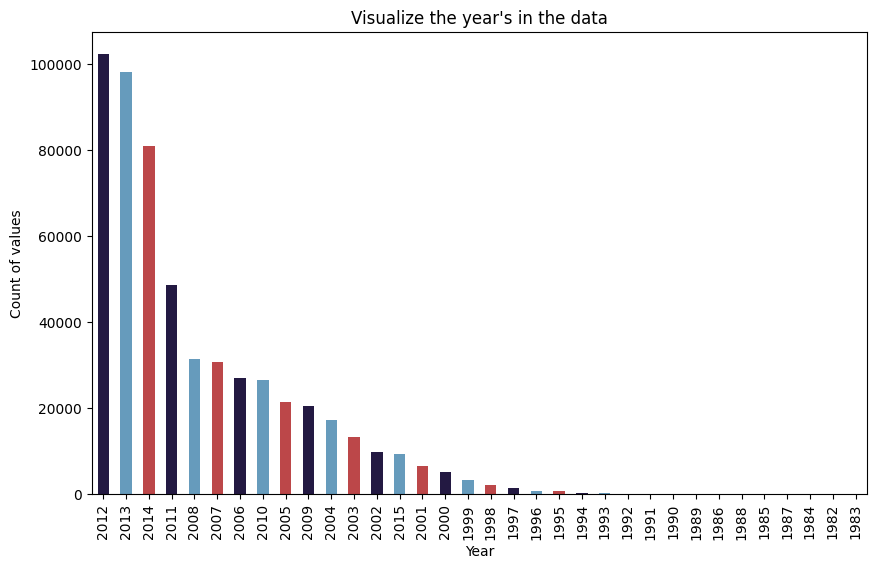

In [5]:
# Whcih year most cars are selled
data['year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),color=['#231942','#669bbc','#bc4749'])
plt.title('Visualize the year\'s in the data')
plt.xlabel('Year')
plt.ylabel('Count of values')
plt.show()

In [6]:
data.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


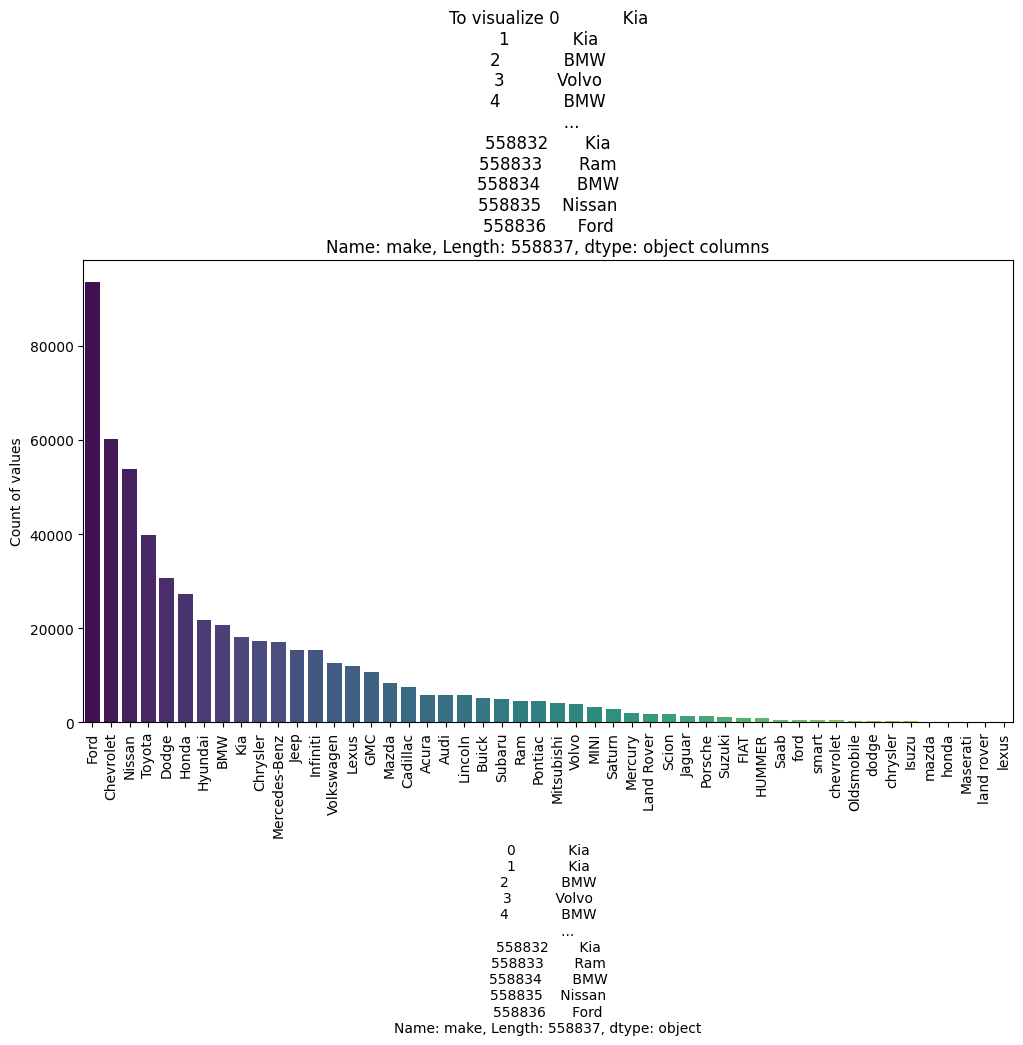

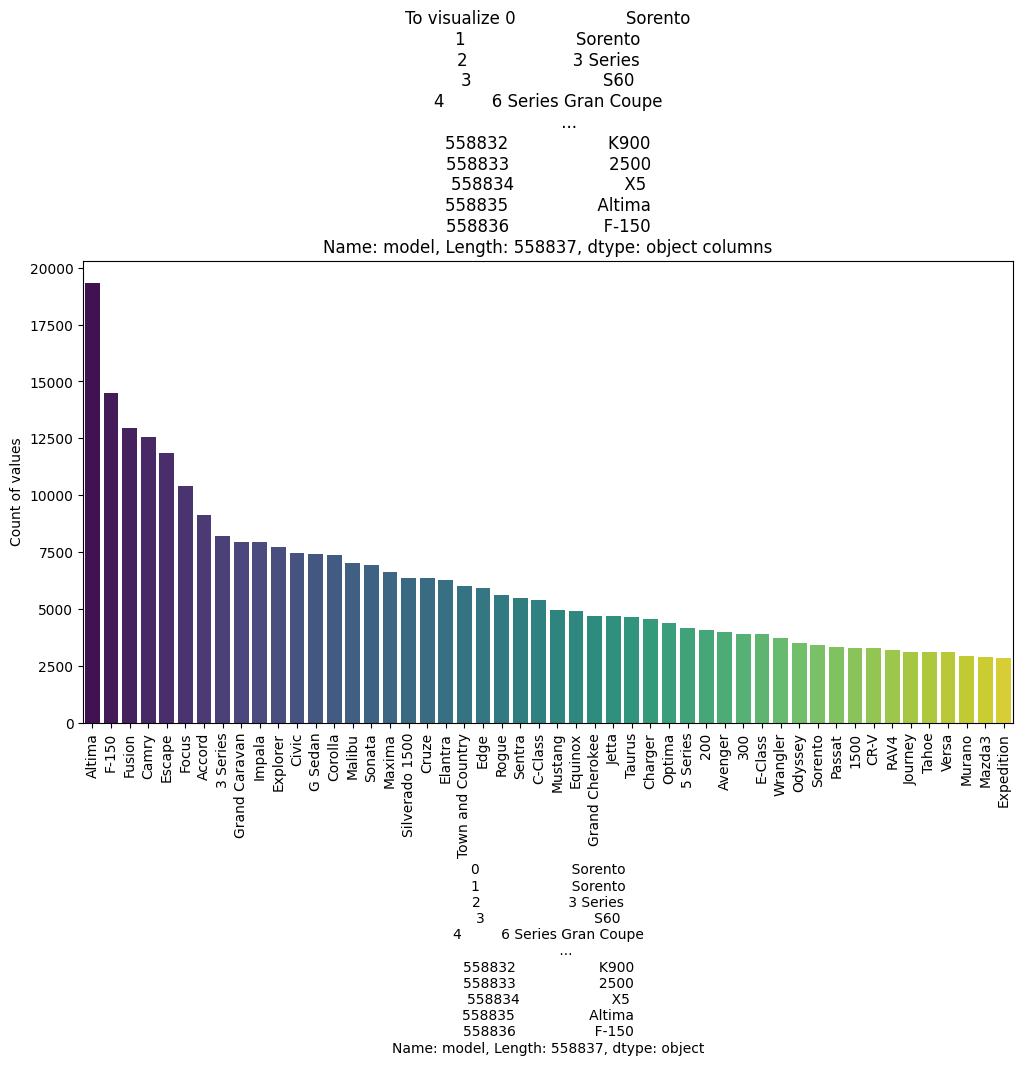

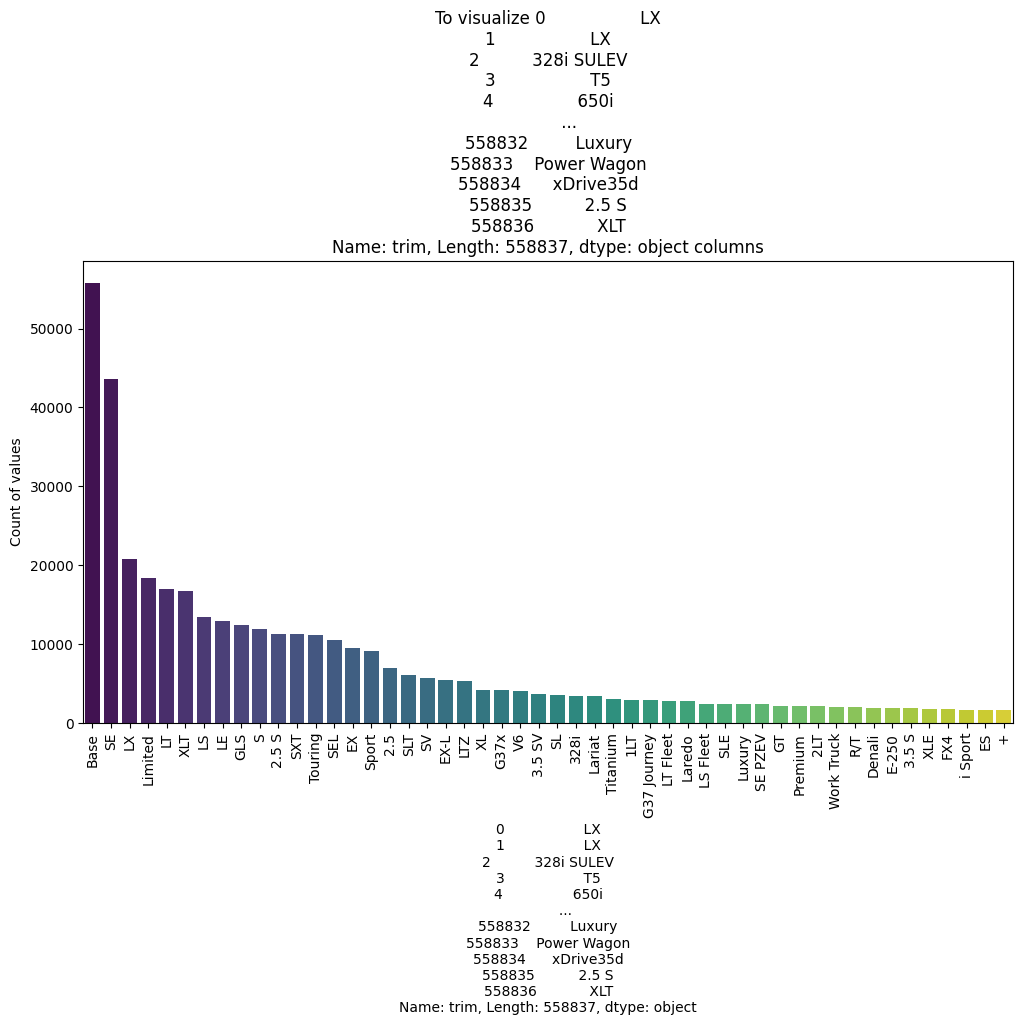

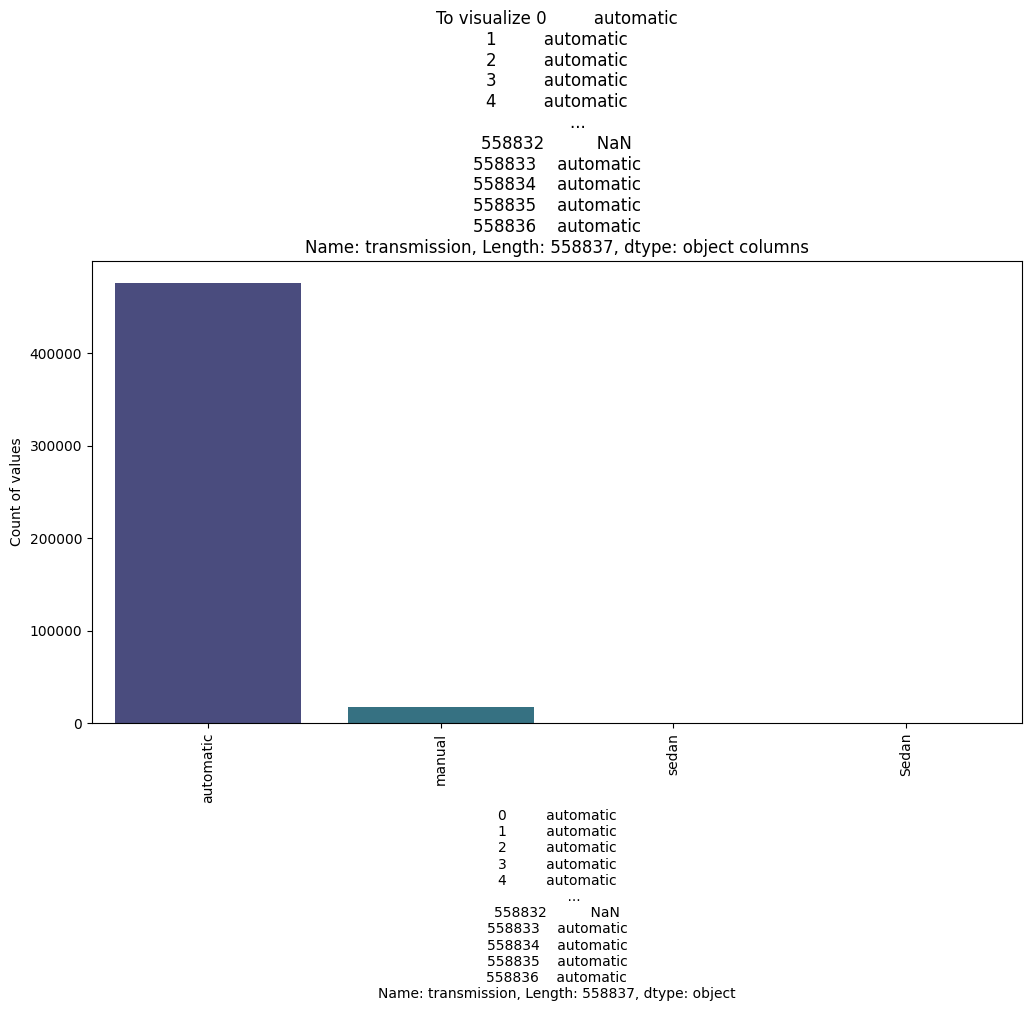

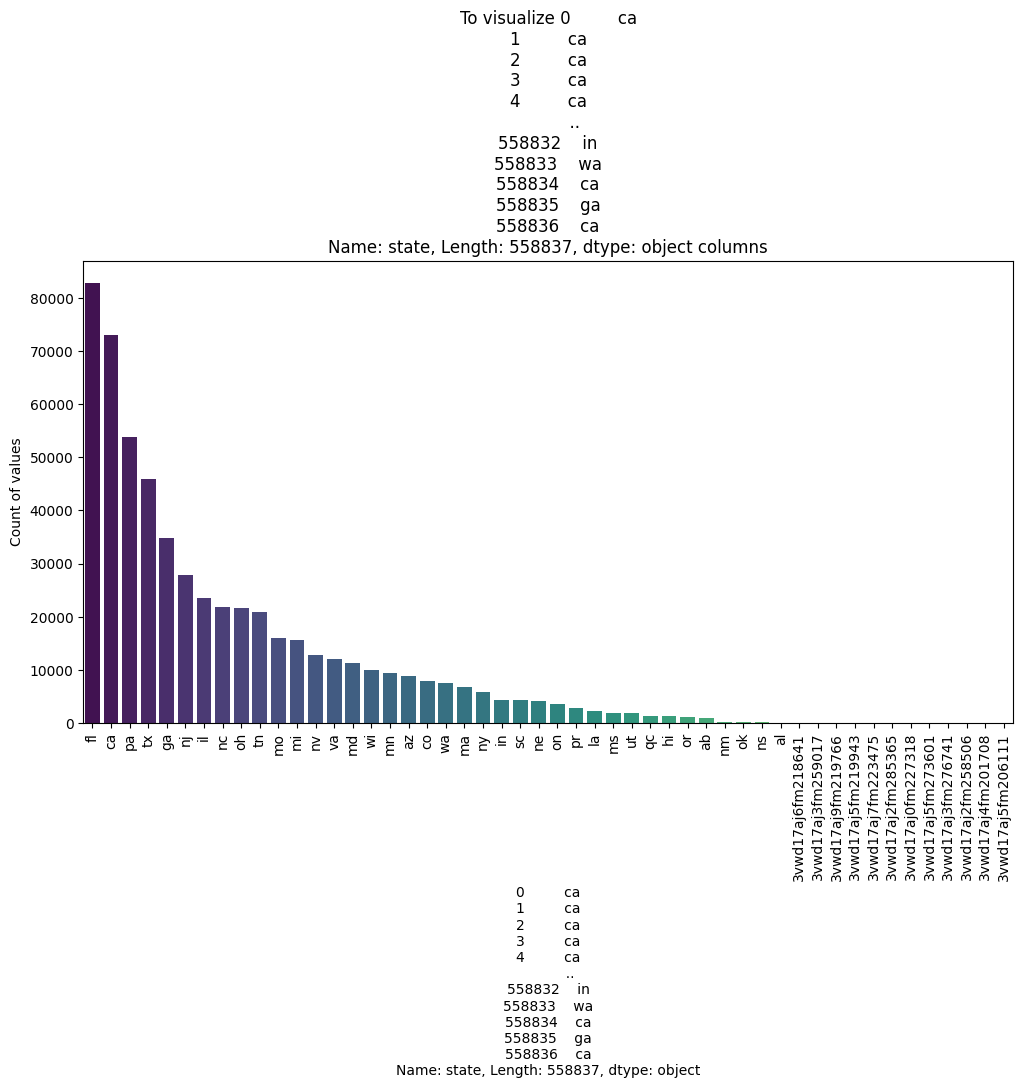

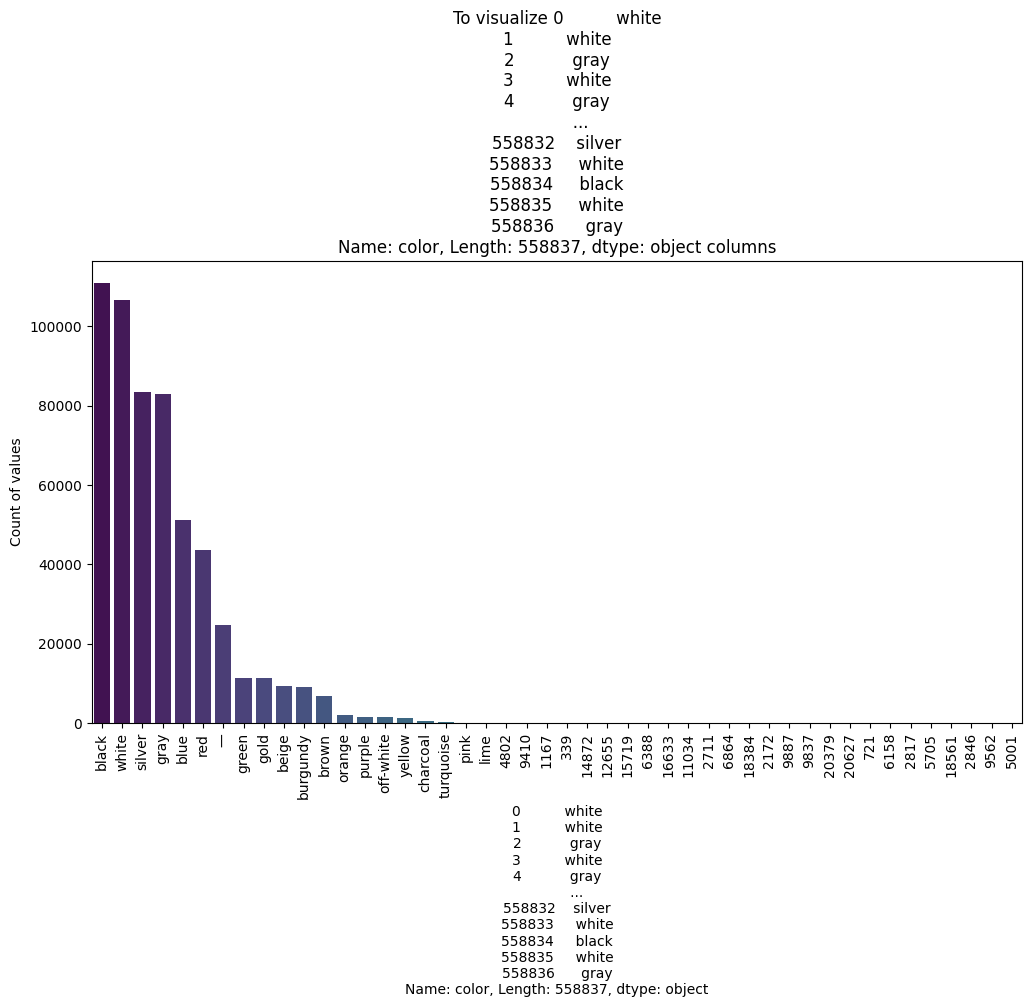

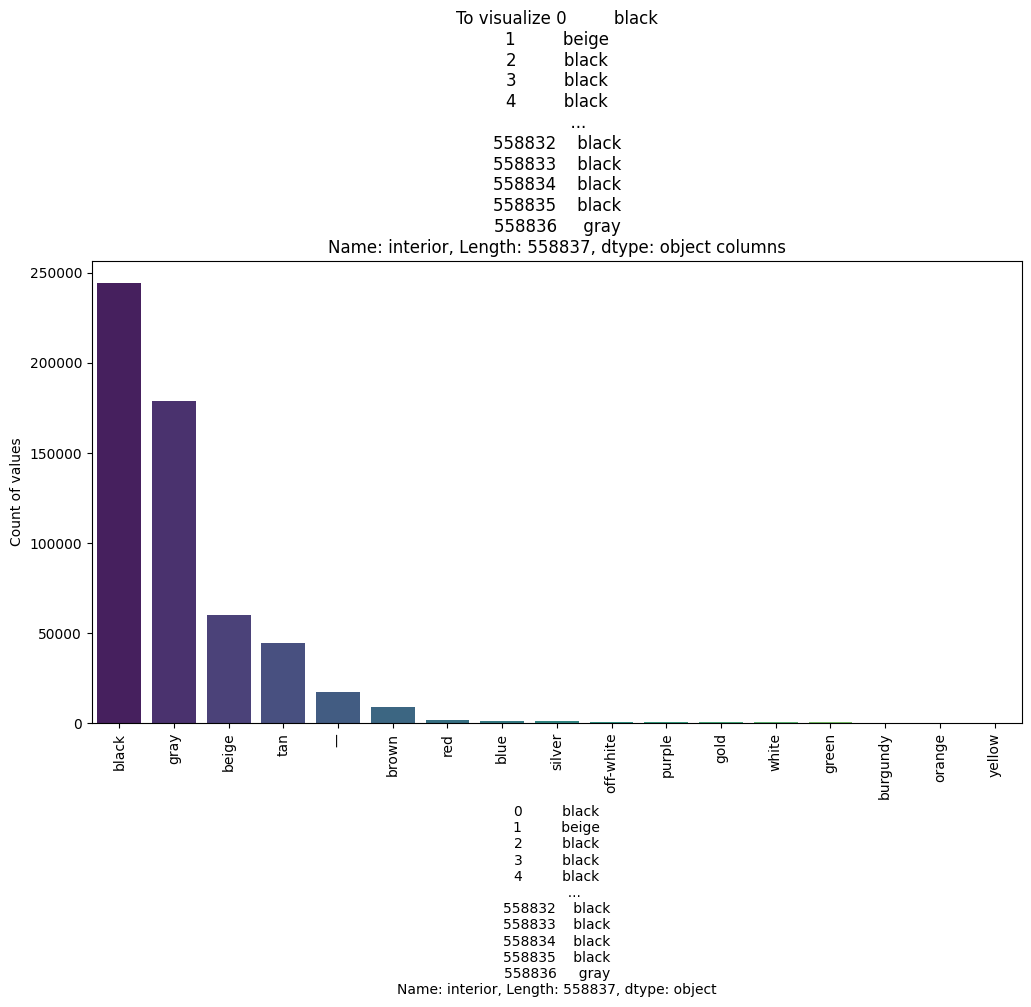

In [7]:
columns=['make','model','trim','transmission','state','color','interior']
for i in columns:
    values_100=data[i].value_counts().sort_values(ascending=False).head(50)
    df_values_100 = pd.DataFrame({i: values_100.index, 'count': values_100.values})
    
    # Plot using seaborn countplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_values_100, x=i, y='count', palette='viridis')
    plt.title(f'To visualize {data[i]} columns')
    plt.xlabel(f'{data[i]}')
    plt.ylabel('Count of values')
    plt.xticks(rotation=90)
    plt.show()

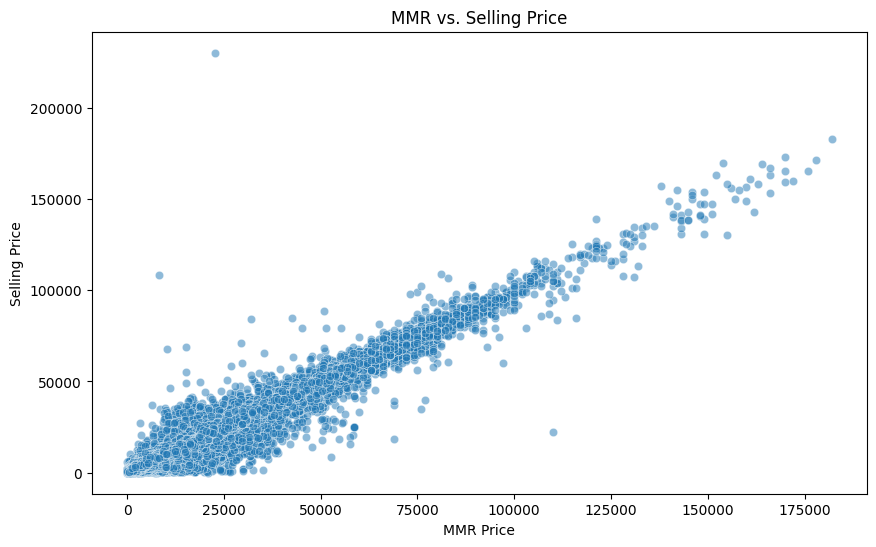

In [8]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='mmr', y='sellingprice', alpha=0.5)
plt.title('MMR vs. Selling Price')
plt.xlabel('MMR Price')
plt.ylabel('Selling Price')
plt.show()


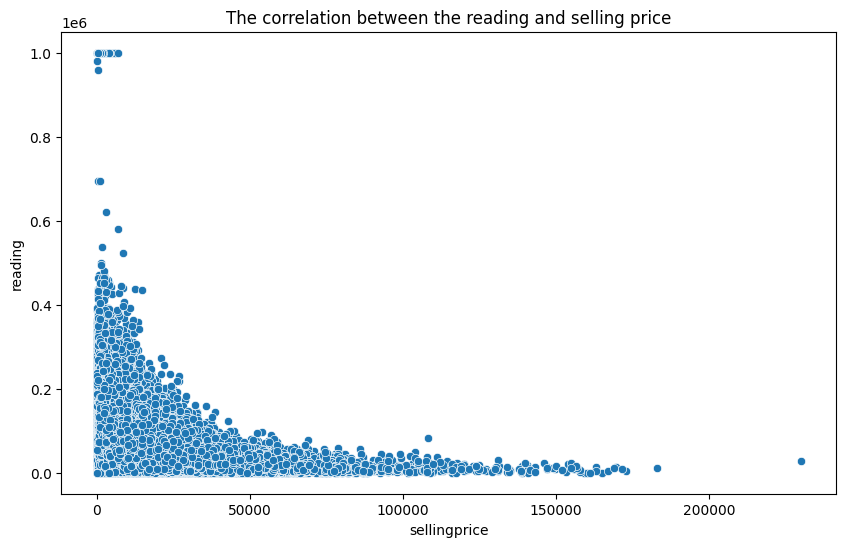

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='sellingprice',y='odometer',)
plt.title('The correlation between the reading and selling price')
plt.xlabel('sellingprice')
plt.ylabel('reading')
plt.show()

In [10]:
# Let's print the unique values in the body column
data['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

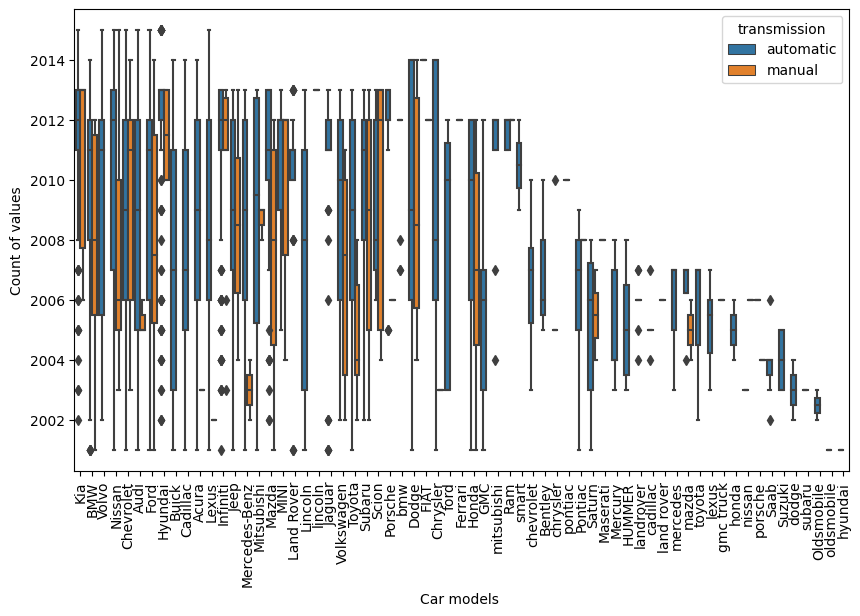

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.head(5000),x='make',y='year',hue='transmission')
plt.xlabel('Car models ')
plt.ylabel('Count of values')
plt.xticks(rotation=90)
plt.show()

In [12]:
# let's take the white color cars and suv models in the data
white_suv=data[(data['color']=='white') & (data['body']=='SUV')]
white_suv.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
17,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,wa1lfafpxea085074,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
31,2014,Audi,SQ5,3.0T Premium Plus quattro,SUV,automatic,wa1cgafp4ea030312,ca,42.0,9606.0,white,black,audi of downtown l a,48600.0,47500.0,Thu Jan 29 2015 04:00:00 GMT-0800 (PST)
45,2014,BMW,X6,xDrive35i,SUV,automatic,5uxfg2c53e0h11080,ca,4.0,379.0,white,black,financial services remarketing (lease),54800.0,51700.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [13]:
def negative_cells(cells):
    if type(cells) !=str and cells < 0:
        return 'color : red'
    else:
        return 'color : yellow'

In [14]:
# Let's print the price of the each car brand with market and selling price
market_price=pd.DataFrame(white_suv.groupby('make')['mmr'].sum().sort_values(ascending=False))
selling_price=pd.DataFrame(white_suv.groupby('make')['sellingprice'].sum().sort_values(ascending=False))
final_price=pd.concat([selling_price,market_price],axis=1)
final_price['differnce_amount']=final_price['mmr']- final_price['sellingprice']
final_data=final_price.style.applymap(negative_cells)
final_data

,sellingprice,mmr,differnce_amount
make,,,
Ford,65357294.000000,65498300.000000,141006.000000
Chevrolet,38480478.000000,38639875.000000,159397.000000
Jeep,31480304.000000,31491350.000000,11046.000000
Nissan,23951897.000000,23896200.000000,-55697.000000
GMC,20362505.000000,20082325.000000,-280180.000000
Toyota,18327196.000000,18101750.000000,-225446.000000
BMW,17508875.000000,17386825.000000,-122050.000000
Mercedes-Benz,16812800.000000,16852475.000000,39675.000000
Lexus,15437115.000000,15110900.000000,-326215.000000


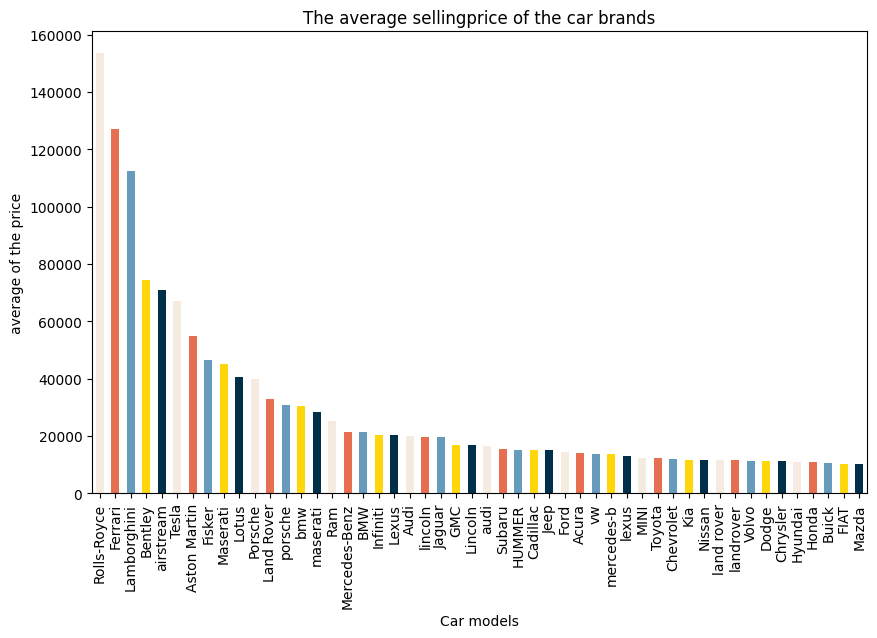

In [15]:
# Which type of the brand have more selling price in the data
brand_name=data.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(50)
brand_name.plot(kind='bar',figsize=(10,6),color=['#f5ebe0','#e76f51','#669bbc','#ffd60a','#003049'])
plt.title('The average sellingprice of the car brands')
plt.xlabel('Car models')
plt.ylabel('average of the price')
plt.show()

In [16]:
data['diff_amount']=data['mmr']-data['sellingprice']
data.style.applymap(negative_cells)
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,diff_amount
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),-1000.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),-700.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1900.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),-250.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),-1000.0


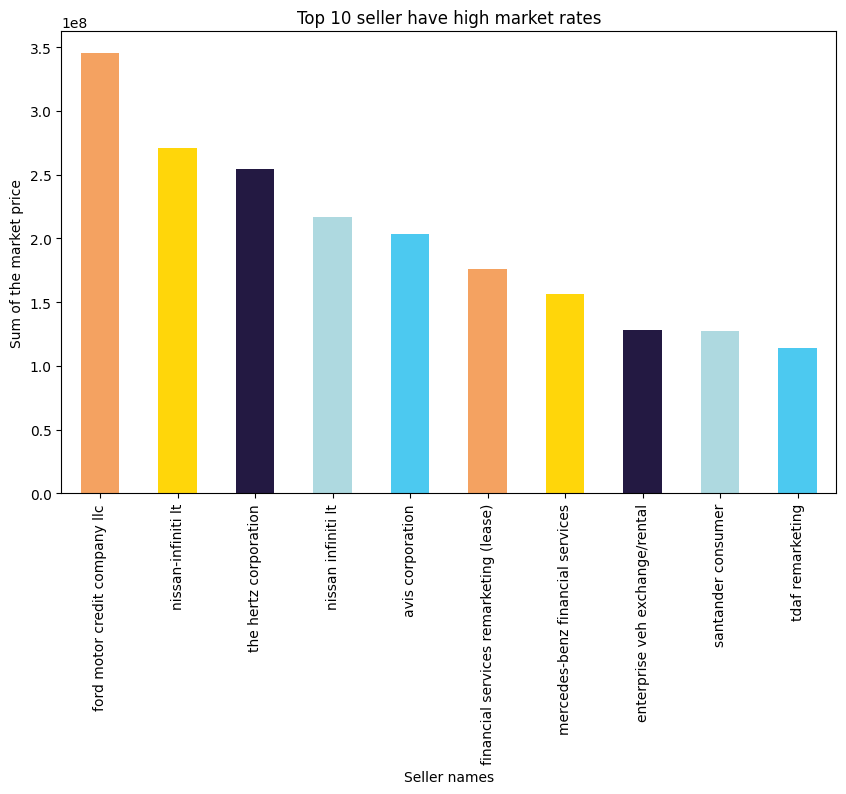

In [17]:
# Top 10 seller have high market price
colors=['#f4a261','#ffd60a','#231942','#aed9e0','#4cc9f0']
data.groupby('seller')['mmr'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,6),color=colors)
plt.title("Top 10 seller have high market rates")
plt.xlabel('Seller names')
plt.ylabel('Sum of the market price')
plt.show()

In [20]:
# Split the sales data into month and year wise
data['saledate']=pd.to_datetime(data['saledate'],utc=True)
data['month']=data['saledate'].dt.month
data['year_1']=data['saledate'].dt.year
data.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,diff_amount,month,year_1
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,-1000.0,12.0,2014.0


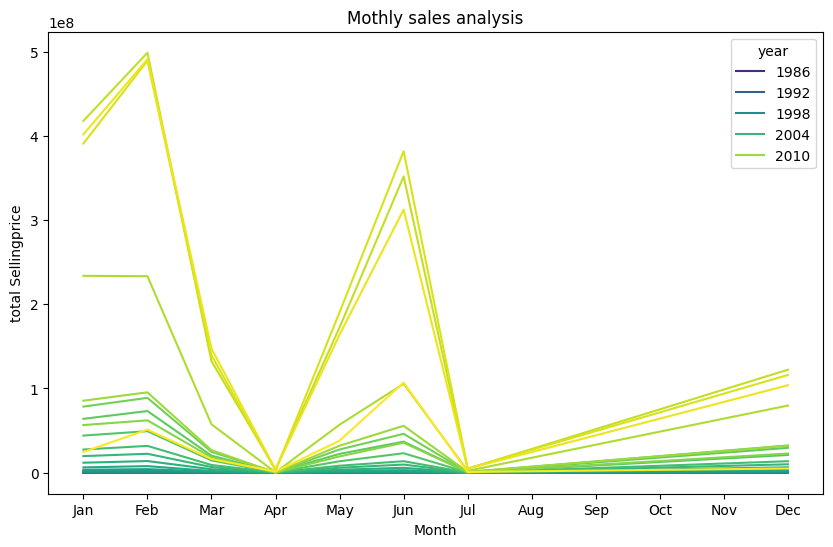

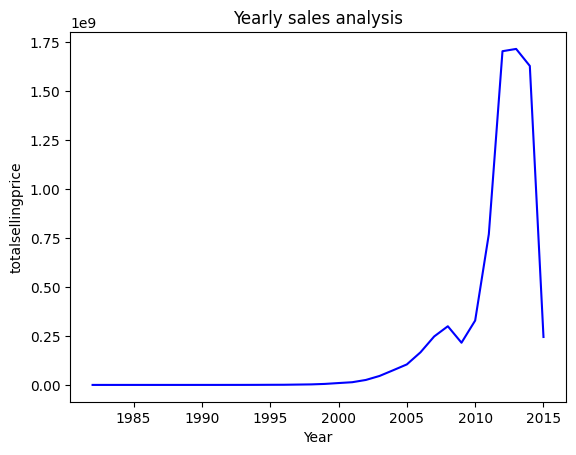

In [21]:
#Monthly and Yearly sales
sales_month=data.groupby(['year','month'])['sellingprice'].sum().reset_index()
sales_year=data.groupby('year')['sellingprice'].sum().reset_index()

# Let's visualize the sum plots
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_month,x='month',y='sellingprice',hue='year', palette='viridis')
plt.title("Mothly sales analysis")
plt.xlabel("Month")
plt.ylabel("total Sellingprice")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


sns.lineplot(data=sales_year,x='year',y='sellingprice',color='blue')
plt.title("Yearly sales analysis")
plt.xlabel('Year')
plt.ylabel("totalsellingprice")
plt.show()

In [22]:
# Find the how many cars selles in the each state
car_sells=pd.DataFrame(data.groupby(['state','make'])['year'].value_counts().sort_values(ascending=False).head(200).unstack())
car_sells.style.background_gradient(cmap='hsv_r')

In [23]:
# Find the relation between any state have particuler color they buy
top_50=pd.DataFrame(data.groupby('color')['state'].value_counts().sort_values(ascending=False).head(100).unstack())
top_50.style.background_gradient(cmap='gist_ncar_r')


state,fl,ca,pa,tx,ga,nj,il,tn,oh,nc,mi,mo,nv,wi,md,va,az,co,mn,wa
color,,,,,,,,,,,,,,,,,,,,
white,16326.000000,16242.000000,9175.000000,9962.000000,6375.000000,5003.000000,4146.000000,3420.000000,3509.000000,4055.000000,2973.000000,2956.000000,2565.000000,1577.000000,1550.000000,1898.000000,1855.000000,1642.000000,1630.000000,1525.000000
black,15533.000000,14877.000000,12444.000000,8472.000000,7222.000000,6422.000000,5213.000000,3706.000000,4610.000000,3721.000000,3580.000000,2945.000000,2286.000000,2297.000000,2132.000000,1999.000000,nan,1523.000000,1585.000000,nan
gray,11569.000000,12517.000000,8881.000000,5918.000000,5222.000000,4692.000000,3983.000000,2477.000000,3098.000000,2860.000000,1778.000000,2048.000000,1957.000000,1811.000000,1542.000000,1592.000000,nan,nan,nan,nan
silver,12382.000000,10757.000000,7755.000000,6777.000000,5266.000000,3601.000000,3166.000000,2036.000000,3114.000000,3963.000000,2272.000000,2433.000000,1991.000000,nan,2097.000000,2054.000000,1621.000000,nan,nan,nan
blue,7405.000000,6005.000000,5197.000000,3751.000000,2942.000000,2620.000000,2222.000000,nan,2199.000000,2451.000000,1682.000000,nan,nan,nan,nan,1531.000000,nan,nan,nan,nan
red,6739.000000,4426.000000,3864.000000,3963.000000,2791.000000,1627.000000,2162.000000,nan,2017.000000,1638.000000,1603.000000,1753.000000,nan,nan,nan,nan,nan,nan,nan,nan
—,4535.000000,2595.000000,1959.000000,2476.000000,nan,nan,nan,5201.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gold,2328.000000,1716.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
green,1783.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
